In [1]:
import sys

sys.path.append("/gstore/project/paneldesign/pkg")

sys.path.append("/gstore/home/taol9/gitsss/yo/tao")
# import primer3
from Bio import SeqIO
from Bio.Seq import Seq
from Bio import Entrez
import csv
import pandas as pd
from collections import defaultdict,OrderedDict
from collections import Counter
import matplotlib.pyplot as plt

import pandas as pd
import os
import pickle



In [2]:
!pip install --target /gstore/project/paneldesign/pkg dill

  Using cached dill-0.3.4-py2.py3-none-any.whl (86 kB)
ERROR: Exception:
Traceback (most recent call last):
  File "/gstore/apps/Anaconda3/5.0.1/lib/python3.6/shutil.py", line 544, in move
    os.rename(src, real_dst)
OSError: [Errno 18] Invalid cross-device link: '/local/3007171/pip-target-hzkvhodm/lib/python/dill-0.3.4.dist-info' -> '/gstore/project/paneldesign/pkg/dill-0.3.4.dist-info'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/gstore/apps/Python-dev/1.0.0-Python-3.6.3/lib/python3.6/site-packages/pip/_internal/cli/base_command.py", line 164, in exc_logging_wrapper
    status = run_func(*args)
  File "/gstore/apps/Python-dev/1.0.0-Python-3.6.3/lib/python3.6/site-packages/pip/_internal/cli/req_command.py", line 205, in wrapper
    return func(self, options, args)
  File "/gstore/apps/Python-dev/1.0.0-Python-3.6.3/lib/python3.6/site-packages/pip/_internal/commands/install.py", line 464, in run
    options.target_dir

In [2]:
# pip install --target /gstore/project/paneldesign/pkg biopython

# flex probe Design

When designing custom probes, consider the
following:
• GC content should be between 44 − 72% for each
25 bp probe half.
• Avoid homopolymer repeats.
• Avoid overlap with annotated repeat or low complexity
sequences.
• If possible, design probes for coding regions of
mRNA as opposed to untranslated regions.
# The 25th nucleotide of the probe (3' most nucleotide of the LHS probe) must be a T. The complementary nucleotide in the target RNAmust be an A.
• Avoid common single nucleotide polymorphisms
(SNPs) and potential mismatches at the ligation
junction. Refer to the UCSC Genome Browser and
the Single Nucleotide Polymorphism Database
(dbSNP). If avoiding SNPs is not possible, SNPs and
mismatches should be at least four bp away from
the ligation junction.
• If probes can bind to sequences other than the
target mRNA sequence, off-target signal may be
observed. To check for off-target homology, align
the probe sequence to the reference transcriptome
using the Basic Local Alignment Search Tool
(BLAST). Matches to off-target genes should have
at least five mismatches in at least one of the LHS
or RHS probes to prevent efficient hybridization.
• Designing three probe pairs per target mRNA
is recommended, especially for low expressing
genes. However, if the gene is not long enough or
there aren't enough specific 50 bp regions, fewer
than three probe pairs is acceptable.
## Probe pairs should not overlap to avoid competition
between probes for the same binding site in
the target RNA.
• Add new probe sequences to the probe set reference
CSV file. Refer to the Analysis section for
more information.

# structure

left_arm="CCTTGGCACCCGAGAATTCCA"+target_LHS
right_arm="/5Phos/"+target_RHS+"ACGCGGTTAGCACGTA-NN"+probeset_barcode_8nt+"CGGTCCTAGCAA"

fulllib:
p7+i7+left_arm+right_arm+10xumi+10xcellbarcode+read1seqprimer+i5+p5

left_arm_snv=snv_dialout_adaptor+"CCTTGGCACCCGAGAATTCCA"+target_LHS
padlock=right_arm+left_arm_snv

# check strand,make sure statred with ATG
mRNA is the template strand, starting from ATG....
# probe strand is cs of mRNA strand

In [2]:
#check GC

#https://biopython.org/docs/1.75/api/Bio.SeqUtils.MeltingTemp.html
from Bio.SeqUtils import MeltingTemp as mt
from Bio.Seq import Seq


In [3]:
# mutation codes are 1 based index, python is 0 based, convert that!
# for rna probes, use shorter arm
def get_target_LHS(template,mutation):
    mutation_position=int(mutation[2:-3])-1
    ref_base=mutation[-3]
    mutation_base=mutation[-1]
    if template[mutation_position]==ref_base:
        for l in range(25,28,1):
#         for l in range(22,23,1):

            mystring=Seq(template[mutation_position:mutation_position+l])
            gc=mt.Tm_GC(mystring)
            if 44<gc<70:
                return (str(mystring.reverse_complement()), 
                       str(Seq(mutation_base+str(mystring[:-1])).reverse_complement()))
                break
    else:
        return "wrong input", mutation_position, mutation_base, ref_base,mutation

In [286]:
def get_target_RHS(template,mutation):
    mutation_position=int(mutation[2:-3])-1
    ref_base=mutation[-3]
    mutation_base=mutation[-1]
    if template[mutation_position]==ref_base:
        for l in range(25,28,1):
#         for l in range(22,23,1):
            mystring=Seq(template[mutation_position-l:mutation_position])
            gc=mt.Tm_GC(mystring)
            if 44<gc<70:
                return str(mystring.reverse_complement())
                break
    else:
        return "wrong input", mutation_base, ref_base, mutation

## define adaptor


In [67]:
barcodes=pd.read_csv('probe-barcodes-fixed-rna-profiling.txt',sep='\t', header=None)
barcodes=barcodes[[1,2]].drop_duplicates()
for i,r in barcodes.iterrows():
    print (r[2],'=', '"'+r[1]+'"')

BC001 = "ACTTTAGG"
BC002 = "AACGGGAA"
BC003 = "AGTAGGCT"
BC004 = "ATGTTGAC"
BC005 = "ACAGACCT"
BC006 = "ATCCCAAC"
BC007 = "AAGTAGAG"
BC008 = "AGCTGTGA"
BC009 = "ACAGTCTG"
BC010 = "AGTGAGTG"
BC011 = "AGAGGCAA"
BC012 = "ACTACTCA"
BC013 = "ATACGTCA"
BC014 = "ATCATGTG"
BC015 = "AACGCCGA"
BC016 = "ATTCGGTT"


In [287]:
BC001 = "ACTTTAGG"
BC002 = "AACGGGAA"
BC003 = "AGTAGGCT"
BC004 = "ATGTTGAC"
BC005 = "ACAGACCT"
BC006 = "ATCCCAAC"
BC007 = "AAGTAGAG"
BC008 = "AGCTGTGA"
BC009 = "ACAGTCTG"
BC010 = "AGTGAGTG"
BC011 = "AGAGGCAA"
BC012 = "ACTACTCA"
BC013 = "ATACGTCA"
BC014 = "ATCATGTG"
BC015 = "AACGCCGA"
BC016 = "ATTCGGTT"

In [227]:
len('ACCATGGCCTGTA')

13

In [254]:
len("GACTCCACACTCATA")

15

In [288]:
# use B013
# use LNA base primer for snv_dialout when run with rna probes
# max lenght set to 120 for rna probes
BC013 = "ATACGTCA"
snv_dialout_adaptor=Mly1_F_w='GCAACGACTCCACACTCATA'

def flex_padlock(template,mutation,probeset_barcode_8nt="ATACGTCA",snv_dialout_adaptor='GCAACGACTCCACACTCATA'):
    target_LHS=get_target_LHS(template,mutation)

    target_RHS=get_target_RHS(template,mutation)
    left_arm0=snv_dialout_adaptor+"CCTTGGCACCCGAGAATTCCA"+target_LHS[0]
    left_arm1=snv_dialout_adaptor+"CCTTGGCACCCGAGAATTCCA"+target_LHS[1]

    right_arm="/5Phos/"+target_RHS+"ACGCGGTTAGCACGTANN"+probeset_barcode_8nt+"CGGTCCTAGCAA"
    #fulllib:
    #p7+i7+left_arm+right_arm+10xumi+10xcellbarcode+read1seqprimer+i5+p5
#     left_arm_snv=snv_dialout_adaptor+"CCTTGGCACCCGAGAATTCCA"+target_LHS
    padlock_ref=right_arm+snv_dialout_adaptor+"CCTTGGCACCCGAGAATTCCA"+target_LHS[0]
    padlock_alt=right_arm+snv_dialout_adaptor+"CCTTGGCACCCGAGAATTCCA"+target_LHS[1]
#     print (len(target_RHS+"ACGCGGTTAGCACGTANN"+probeset_barcode_8nt+"CGGTCCTAGCAA")+len(left_arm0), len(target_LHS[0]),len(target_RHS))

    return {'LHS_ref':left_arm0, 'target_LHS_ref':target_LHS[0], 'LHS_mut':left_arm1, 'target_LHS_mut':target_LHS[1],'target_RHS':target_RHS,"RHS":right_arm, "padlock_ref":padlock_ref, "padlock_alt":padlock_alt,}

In [219]:
# convert to padlock probe

In [245]:
KRAS_CDS='''ATGACTGAATATAAACTTGTGGTAGTTGGAGCTGGTGGCGTAGGCAAGAGTGCCTTGACGATACAGCTAATTCAGAATCATTTTGTGGACGAATATGATCCAACAATAGAGGATTCCTAC
AGGAAGCAAGTAGTAATTGATGGAGAAACCTGTCTCTTGGATATTCTCGACACAGCAGGT
CAAGAGGAGTACAGTGCAATGAGGGACCAGTACATGAGGACTGGGGAGGGCTTTCTTTGT
GTATTTGCCATAAATAATACTAAATCATTTGAAGATATTCACCATTATAGAGAACAAATT
AAAAGAGTTAAGGACTCTGAAGATGTACCTATGGTCCTAGTAGGAAATAAATGTGATTTG
CCTTCTAGAACAGTAGACACAAAACAGGCTCAGGACTTAGCAAGAAGTTATGGAATTCCT
TTTATTGAAACATCAGCAAAGACAAGACAGAGAGTGGAGGATGCTTTTTATACATTGGTG
AGAGAGATCCGACAATACAGATTGAAAAAAATCAGCAAAGAAGAAAAGACTCCTGGCTGT
GTGAAAATTAAAAAATGCATTATAATGTAA'''
KRAS_CDS=KRAS_CDS.replace('\n','')



In [260]:
KRAS_flex=flex_padlock(KRAS_CDS,'c.34G>T')
KRAS_flex

118 22 22


{'LHS_ref': 'GACTCCACACTCATACCTTGGCACCCGAGAATTCCAAGGCACTCTTGCCTACGCCACC',
 'target_LHS_ref': 'AGGCACTCTTGCCTACGCCACC',
 'LHS_mut': 'GACTCCACACTCATACCTTGGCACCCGAGAATTCCAGGCACTCTTGCCTACGCCACCA',
 'target_LHS_mut': 'GGCACTCTTGCCTACGCCACCA',
 'target_RHS': 'AGCTCCAACTACCACAAGTTTA',
 'RHS': '/5Phos/AGCTCCAACTACCACAAGTTTAACGCGGTTAGCACGTANNATACGTCACGGTCCTAGCAA',
 'padlock_ref': '/5Phos/AGCTCCAACTACCACAAGTTTAACGCGGTTAGCACGTANNATACGTCACGGTCCTAGCAAGACTCCACACTCATACCTTGGCACCCGAGAATTCCAAGGCACTCTTGCCTACGCCACC',
 'padlock_alt': '/5Phos/AGCTCCAACTACCACAAGTTTAACGCGGTTAGCACGTANNATACGTCACGGTCCTAGCAAGACTCCACACTCATACCTTGGCACCCGAGAATTCCAGGCACTCTTGCCTACGCCACCA'}

In [91]:
TP63_CDS='''ATGAATTTTGAAACTTCACGGTGTGCCACCCTACAGTACTGCCCTGACCCTTACATCCAGCGTTTCGTAG
AAACCCCAGCTCATTTCTCTTGGAAAGAAAGTTATTACCGATCCACCATGTCCCAGAGCACACAGACAAA
TGAATTCCTCAGTCCAGAGGTTTTCCAGCATATCTGGGATTTTCTGGAACAGCCTATATGTTCAGTTCAG
CCCATTGACTTGAACTTTGTGGATGAACCATCAGAAGATGGTGCGACAAACAAGATTGAGATTAGCATGG
ACTGTATCCGCATGCAGGACTCGGACCTGAGTGACCCCATGTGGCCACAGTACACGAACCTGGGGCTCCT
GAACAGCATGGACCAGCAGATTCAGAACGGCTCCTCGTCCACCAGTCCCTATAACACAGACCACGCGCAG
AACAGCGTCACGGCGCCCTCGCCCTACGCACAGCCCAGCTCCACCTTCGATGCTCTCTCTCCATCACCCG
CCATCCCCTCCAACACCGACTACCCAGGCCCGCACAGTTTCGACGTGTCCTTCCAGCAGTCGAGCACCGC
CAAGTCGGCCACCTGGACGTATTCCACTGAACTGAAGAAACTCTACTGCCAAATTGCAAAGACATGCCCC
ATCCAGATCAAGGTGATGACCCCACCTCCTCAGGGAGCTGTTATCCGCGCCATGCCTGTCTACAAAAAAG
CTGAGCACGTCACGGAGGTGGTGAAGCGGTGCCCCAACCATGAGCTGAGCCGTGAATTCAACGAGGGACA
GATTGCCCCTCCTAGTCATTTGATTCGAGTAGAGGGGAACAGCCATGCCCAGTATGTAGAAGATCCCATC
ACAGGAAGACAGAGTGTGCTGGTACCTTATGAGCCACCCCAGGTTGGCACTGAATTCACGACAGTCTTGT
ACAATTTCATGTGTAACAGCAGTTGTGTTGGAGGGATGAACCGCCGTCCAATTTTAATCATTGTTACTCT
GGAAACCAGAGATGGGCAAGTCCTGGGCCGACGCTGCTTTGAGGCCCGGATCTGTGCTTGCCCAGGAAGA
GACAGGAAGGCGGATGAAGATAGCATCAGAAAGCAGCAAGTTTCGGACAGTACAAAGAACGGTGATGGTA
CGAAGCGCCCGTTTCGTCAGAACACACATGGTATCCAGATGACATCCATCAAGAAACGAAGATCCCCAGA
TGATGAACTGTTATACTTACCAGTGAGGGGCCGTGAGACTTATGAAATGCTGTTGAAGATCAAAGAGTCC
CTGGAACTCATGCAGTACCTTCCTCAGCACACAATTGAAACGTACAGGCAACAGCAACAGCAGCAGCACC
AGCACTTACTTCAGAAACAGACCTCAATACAGTCTCCATCTTCATATGGTAACAGCTCCCCACCTCTGAA
CAAAATGAACAGCATGAACAAGCTGCCTTCTGTGAGCCAGCTTATCAACCCTCAGCAGCGCAACGCCCTC
ACTCCTACAACCATTCCTGATGGCATGGGAGCCAACATTCCCATGATGGGCACCCACATGCCAATGGCTG
GAGACATGAATGGACTCAGCCCCACCCAGGCACTCCCTCCCCCACTCTCCATGCCATCCACCTCCCACTG
CACACCCCCACCTCCGTATCCCACAGATTGCAGCATTGTCAGTTTCTTAGCGAGGTTGGGCTGTTCATCA
TGTCTGGACTATTTCACGACCCAGGGGCTGACCACCATCTATCAGATTGAGCATTACTCCATGGATGATC
TGGCAAGTCTGAAAATCCCTGAGCAATTTCGACATGCGATCTGGAAGGGCATCCTGGACCACCGGCAGCT
CCACGAATTCTCCTCCCCTTCTCATCTCCTGCGGACCCCAAGCAGTGCCTCTACAGTCAGTGTGGGCTCC
AGTGAGACCCGGGGTGAGCGTGTTATTGATGCTGTGCGATTCACCCTCCGCCAGACCATCTCTTTCCCAC
CCCGAGATGAGTGGAATGACTTCAACTTTGACATGGATGCTCGCCGCAATAAGCAACAGCGCATCAAAGA
GGAGGGGGAGTGA'''.replace('\n','')

In [250]:
TP63_flex=flex_padlock(TP63_CDS,'c.1090G>A')
TP63_flex

118 22 22


{'LHS_ref': 'GACTCCACACTCATACCTTGGCACCCGAGAATTCCACGTTCTTTGTACTGTCCGAAAC',
 'target_LHS_ref': 'CGTTCTTTGTACTGTCCGAAAC',
 'LHS_mut': 'GACTCCACACTCATACCTTGGCACCCGAGAATTCCAGTTCTTTGTACTGTCCGAAACT',
 'target_LHS_mut': 'GTTCTTTGTACTGTCCGAAACT',
 'target_RHS': 'TTGCTGCTTTCTGATGCTATCT',
 'RHS': '/5Phos/TTGCTGCTTTCTGATGCTATCTACGCGGTTAGCACGTANNATACGTCACGGTCCTAGCAA',
 'padlock_ref': '/5Phos/TTGCTGCTTTCTGATGCTATCTACGCGGTTAGCACGTANNATACGTCACGGTCCTAGCAAGACTCCACACTCATACCTTGGCACCCGAGAATTCCACGTTCTTTGTACTGTCCGAAAC',
 'padlock_alt': '/5Phos/TTGCTGCTTTCTGATGCTATCTACGCGGTTAGCACGTANNATACGTCACGGTCCTAGCAAGACTCCACACTCATACCTTGGCACCCGAGAATTCCAGTTCTTTGTACTGTCCGAAACT'}

In [93]:
FGFR1_CDS='''ATGGAGGCAAGGGTCAGTTTGAAAAGGAGGATCGAGCTCACTGTGGAGTATCCATGGAGATGTGGAGCCT
TGTCACCAACCTCTAACTGCAGAACTGGGATGTGGAGCTGGAAGTGCCTCCTCTTCTGGGCTGTGCTGGT
CACAGCCACACTCTGCACCGCTAGGCCGTCCCCGACCTTGCCTGAACAAGCCCAGCCCTGGGGAGCCCCT
GTGGAAGTGGAGTCCTTCCTGGTCCACCCCGGTGACCTGCTGCAGCTTCGCTGTCGGCTGCGGGACGATG
TGCAGAGCATCAACTGGCTGCGGGACGGGGTGCAGCTGGCGGAAAGCAACCGCACCCGCATCACAGGGGA
GGAGGTGGAGGTGCAGGACTCCGTGCCCGCAGACTCCGGCCTCTATGCTTGCGTAACCAGCAGCCCCTCG
GGCAGTGACACCACCTACTTCTCCGTCAATGTTTCAGATGCTCTCCCCTCCTCGGAGGATGATGATGATG
ATGATGACTCCTCTTCAGAGGAGAAAGAAACAGATAACACCAAACCAAACCCCGTAGCTCCATATTGGAC
ATCCCCAGAAAAGATGGAAAAGAAATTGCATGCAGTGCCGGCTGCCAAGACAGTGAAGTTCAAATGCCCT
TCCAGTGGGACCCCAAACCCCACACTGCGCTGGTTGAAAAATGGCAAAGAATTCAAACCTGACCACAGAA
TTGGAGGCTACAAGGTCCGTTATGCCACCTGGAGCATCATAATGGACTCTGTGGTGCCCTCTGACAAGGG
CAACTACACCTGCATTGTGGAGAATGAGTACGGCAGCATCAACCACACATACCAGCTGGATGTCGTGGAG
CGGTCCCCTCACCGGCCCATCCTGCAAGCAGGGTTGCCCGCCAACAAAACAGTGGCCCTGGGTAGCAACG
TGGAGTTCATGTGTAAGGTGTACAGTGACCCGCAGCCGCACATCCAGTGGCTAAAGCACATCGAGGTGAA
TGGGAGCAAGATTGGCCCAGACAACCTGCCTTATGTCCAGATCTTGAAGACTGCTGGAGTTAATACCACC
GACAAAGAGATGGAGGTGCTTCACTTAAGAAATGTCTCCTTTGAGGACGCAGGGGAGTATACGTGCTTGG
CGGGTAACTCTATCGGACTCTCCCATCACTCTGCATGGTTGACCGTTCTGGAAGCCCTGGAAGAGAGGCC
GGCAGTGATGACCTCGCCCCTGTACCTGGAGATCATCATCTATTGCACAGGGGCCTTCCTCATCTCCTGC
ATGGTGGGGTCGGTCATCGTCTACAAGATGAAGAGTGGTACCAAGAAGAGTGACTTCCACAGCCAGATGG
CTGTGCACAAGCTGGCCAAGAGCATCCCTCTGCGCAGACAGGTAACAGTGTCTGCTGACTCCAGTGCATC
CATGAACTCTGGGGTTCTTCTGGTTCGGCCATCACGGCTCTCCTCCAGTGGGACTCCCATGCTAGCAGGG
GTCTCTGAGTATGAGCTTCCCGAAGACCCTCGCTGGGAGCTGCCTCGGGACAGACTGGTCTTAGGCAAAC
CCCTGGGAGAGGGCTGCTTTGGGCAGGTGGTGTTGGCAGAGGCTATCGGGCTGGACAAGGACAAACCCAA
CCGTGTGACCAAAGTGGCTGTGAAGATGTTGAAGTCGGACGCAACAGAGAAAGACTTGTCAGACCTGATC
TCAGAAATGGAGATGATGAAGATGATCGGGAAGCATAAGAATATCATCAACCTGCTGGGGGCCTGCACGC
AGGATGGTCCCTTGTATGTCATCGTGGAGTATGCCTCCAAGGGCAACCTGCGGGAGTACCTGCAGGCCCG
GAGGCCCCCAGGGCTGGAATACTGCTACAACCCCAGCCACAACCCAGAGGAGCAGCTCTCCTCCAAGGAC
CTGGTGTCCTGCGCCTACCAGGTGGCCCGAGGCATGGAGTATCTGGCCTCCAAGAAGTGCATACACCGAG
ACCTGGCAGCCAGGAATGTCCTGGTGACAGAGGACAATGTGATGAAGATAGCAGACTTTGGCCTCGCACG
GGACATTCACCACATCGACTACTATAAAAAGACAACCAACGGCCGACTGCCTGTGAAGTGGATGGCACCC
GAGGCATTATTTGACCGGATCTACACCCACCAGAGTGATGTGTGGTCTTTCGGGGTGCTCCTGTGGGAGA
TCTTCACTCTGGGCGGCTCCCCATACCCCGGTGTGCCTGTGGAGGAACTTTTCAAGCTGCTGAAGGAGGG
TCACCGCATGGACAAGCCCAGTAACTGCACCAACGAGCTGTACATGATGATGCGGGACTGCTGGCATGCA
GTGCCCTCACAGAGACCCACCTTCAAGCAGCTGGTGGAAGACCTGGACCGCATCGTGGCCTTGACCTCCA
ACCAGGAGTACCTGGACCTGTCCATGCCCCTGGACCAGTACTCCCCCAGCTTTCCCGACACCCGGAGCTC
TACGTGCTCCTCAGGGGAGGATTCCGTCTTCTCTCATGAGCCGCTGCCCGAGGAGCCCTGCCTGCCCCGA
CACCCAGCCCAGCTTGCCAATGGCGGACTCAAACGCCGCTGA'''.replace('\n','')

In [251]:
FGFR1_flex=flex_padlock(FGFR1_CDS, "c.719G>A")
FGFR1_flex

118 22 22


{'LHS_ref': 'GACTCCACACTCATACCTTGGCACCCGAGAATTCCAATGATGCTCCAGGTGGCATAAC',
 'target_LHS_ref': 'ATGATGCTCCAGGTGGCATAAC',
 'LHS_mut': 'GACTCCACACTCATACCTTGGCACCCGAGAATTCCATGATGCTCCAGGTGGCATAACT',
 'target_LHS_mut': 'TGATGCTCCAGGTGGCATAACT',
 'target_RHS': 'GGACCTTGTAGCCTCCAATTCT',
 'RHS': '/5Phos/GGACCTTGTAGCCTCCAATTCTACGCGGTTAGCACGTANNATACGTCACGGTCCTAGCAA',
 'padlock_ref': '/5Phos/GGACCTTGTAGCCTCCAATTCTACGCGGTTAGCACGTANNATACGTCACGGTCCTAGCAAGACTCCACACTCATACCTTGGCACCCGAGAATTCCAATGATGCTCCAGGTGGCATAAC',
 'padlock_alt': '/5Phos/GGACCTTGTAGCCTCCAATTCTACGCGGTTAGCACGTANNATACGTCACGGTCCTAGCAAGACTCCACACTCATACCTTGGCACCCGAGAATTCCATGATGCTCCAGGTGGCATAACT'}

In [ ]:
### https://cancer.sanger.ac.uk/cosmic/mutation/overview?id=130818805

In [200]:
PTPRC='''ATGACCATGTATTTGTGGCTTAAACTCTTGGCATTTGGCTTTGCCTTTCTGGACACAGAAGTATTTGTGA
CAGGGCAAAGCCCAACACCTTCCCCCACTGGATTGACTACAGCAAAGATGCCCAGTGTTCCACTTTCAAG
TGACCCCTTACCTACTCACACCACTGCATTCTCACCCGCAAGCACCTTTGAAAGAGAAAATGACTTCTCA
GAGACCACAACTTCTCTTAGTCCAGACAATACTTCCACCCAAGTATCCCCGGACTCTTTGGATAATGCTA
GTGCTTTTAATACCACAGGTGTTTCATCAGTACAGACGCCTCACCTTCCCACGCACGCAGACTCGCAGAC
GCCCTCTGCTGGAACTGACACGCAGACATTCAGCGGCTCCGCCGCCAATGCAAAACTCAACCCTACCCCA
GGCAGCAATGCTATCTCAGATGTCCCAGGAGAGAGGAGTACAGCCAGCACCTTTCCTACAGACCCAGTTT
CCCCATTGACAACCACCCTCAGCCTTGCACACCACAGCTCTGCTGCCTTACCTGCACGCACCTCCAACAC
CACCATCACAGCGAACACCTCAGATGCCTACCTTAATGCCTCTGAAACAACCACTCTGAGCCCTTCTGGA
AGCGCTGTCATTTCAACCACAACAATAGCTACTACTCCATCTAAGCCAACATGTGATGAAAAATATGCAA
ACATCACTGTGGATTACTTATATAACAAGGAAACTAAATTATTTACAGCAAAGCTAAATGTTAATGAGAA
TGTGGAATGTGGAAACAATACTTGCACAAACAATGAGGTGCATAACCTTACAGAATGTAAAAATGCGTCT
GTTTCCATATCTCATAATTCATGTACTGCTCCTGATAAGACATTAATATTAGATGTGCCACCAGGGGTTG
AAAAGTTTCAGTTACATGATTGTACACAAGTTGAAAAAGCAGATACTACTATTTGTTTAAAATGGAAAAA
TATTGAAACCTTTACTTGTGATACACAGAATATTACCTACAGATTTCAGTGTGGTAATATGATATTTGAT
AATAAAGAAATTAAATTAGAAAACCTTGAACCCGAACATGAGTATAAGTGTGACTCAGAAATACTCTATA
ATAACCACAAGTTTACTAACGCAAGTAAAATTATTAAAACAGATTTTGGGAGTCCAGGAGAGCCTCAGAT
TATTTTTTGTAGAAGTGAAGCTGCACATCAAGGAGTAATTACCTGGAATCCCCCTCAAAGATCATTTCAT
AATTTTACCCTCTGTTATATAAAAGAGACAGAAAAAGATTGCCTCAATCTGGATAAAAACCTGATCAAAT
ATGATTTGCAAAATTTAAAACCTTATACGAAATATGTTTTATCATTACATGCCTACATCATTGCAAAAGT
GCAACGTAATGGAAGTGCTGCAATGTGTCATTTCACAACTAAAAGTGCTCCTCCAAGCCAGGTCTGGAAC
ATGACTGTCTCCATGACATCAGATAATAGTATGCATGTCAAGTGTAGGCCTCCCAGGGACCGTAATGGCC
CCCATGAACGTTACCATTTGGAAGTTGAAGCTGGAAATACTCTGGTTAGAAATGAGTCGCATAAGAATTG
CGATTTCCGTGTAAAAGATCTTCAATATTCAACAGACTACACTTTTAAGGCCTATTTTCACAATGGAGAC
TATCCTGGAGAACCCTTTATTTTACATCATTCAACATCTTATAATTCTAAGGCACTGATAGCATTTCTGG
CATTTCTGATTATTGTGACATCAATAGCCCTGCTTGTTGTTCTCTACAAAATCTATGATCTACATAAGAA
AAGATCCTGCAATTTAGATGAACAGCAGGAGCTTGTTGAAAGGGATGATGAAAAACAACTGATGAATGTG
GAGCCAATCCATGCAGATATTTTGTTGGAAACTTATAAGAGGAAGATTGCTGATGAAGGAAGACTTTTTC
TGGCTGAATTTCAGAGCATCCCGCGGGTGTTCAGCAAGTTTCCTATAAAGGAAGCTCGAAAGCCCTTTAA
CCAGAATAAAAACCGTTATGTTGACATTCTTCCTTATGATTATAACCGTGTTGAACTCTCTGAGATAAAC
GGAGATGCAGGGTCAAACTACATAAATGCCAGCTATATTGATGGTTTCAAAGAACCCAGGAAATACATTG
CTGCACAAGGTCCCAGGGATGAAACTGTTGATGATTTCTGGAGGATGATTTGGGAACAGAAAGCCACAGT
TATTGTCATGGTCACTCGATGTGAAGAAGGAAACAGGAACAAGTGTGCAGAATACTGGCCGTCAATGGAA
GAGGGCACTCGGGCTTTTGGAGATGTTGTTGTAAAGATCAACCAGCACAAAAGATGTCCAGATTACATCA
TTCAGAAATTGAACATTGTAAATAAAAAAGAAAAAGCAACTGGAAGAGAGGTGACTCACATTCAGTTCAC
CAGCTGGCCAGACCACGGGGTGCCTGAGGATCCTCACTTGCTCCTCAAACTGAGAAGGAGAGTGAATGCC
TTCAGCAATTTCTTCAGTGGTCCCATTGTGGTGCACTGCAGTGCTGGTGTTGGGCGCACAGGAACCTATA
TCGGAATTGATGCCATGCTAGAAGGCCTGGAAGCCGAGAACAAAGTGGATGTTTATGGTTATGTTGTCAA
GCTAAGGCGACAGAGATGCCTGATGGTTCAAGTAGAGGCCCAGTACATCTTGATCCATCAGGCTTTGGTG
GAATACAATCAGTTTGGAGAAACAGAAGTGAATTTGTCTGAATTACATCCATATCTACATAACATGAAGA
AAAGGGATCCACCCAGTGAGCCGTCTCCACTAGAGGCTGAATTCCAGAGACTTCCTTCATATAGGAGCTG
GAGGACACAGCACATTGGAAATCAAGAAGAAAATAAAAGTAAAAACAGGAATTCTAATGTCATCCCATAT
GACTATAACAGAGTGCCACTTAAACATGAGCTGGAAATGAGTAAAGAGAGTGAGCATGATTCAGATGAAT
CCTCTGATGATGACAGTGATTCAGAGGAACCAAGCAAATACATCAATGCATCTTTTATAATGAGCTACTG
GAAACCTGAAGTGATGATTGCTGCTCAGGGACCACTGAAGGAGACCATTGGTGACTTTTGGCAGATGATC
TTCCAAAGAAAAGTCAAAGTTATTGTTATGCTGACAGAACTGAAACATGGAGACCAGGAAATCTGTGCTC
AGTACTGGGGAGAAGGAAAGCAAACATATGGAGATATTGAAGTTGACCTGAAAGACACAGACAAATCTTC
AACTTATACCCTTCGTGTCTTTGAACTGAGACATTCCAAGAGGAAAGACTCTCGAACTGTGTACCAGTAC
CAATATACAAACTGGAGTGTGGAGCAGCTTCCTGCAGAACCCAAGGAATTAATCTCTATGATTCAGGTCG
TCAAACAAAAACTTCCCCAGAAGAATTCCTCTGAAGGGAACAAGCATCACAAGAGTACACCTCTACTCAT
TCACTGCAGGGATGGATCTCAGCAAACGGGAATATTTTGTGCTTTGTTAAATCTCTTAGAAAGTGCGGAA
ACAGAAGAGGTAGTGGATATTTTTCAAGTGGTAAAAGCTCTACGCAAAGCTAGGCCAGGCATGGTTTCCA
CATTCGAGCAATATCAATTCCTATATGACGTCATTGCCAGCACCTACCCTGCTCAGAATGGACAAGTAAA
GAAAAACAACCATCAAGAAGATAAAATTGAATTTGATAATGAAGTGGACAAAGTAAAGCAGGATGCTAAT
TGTGTTAATCCACTTGGTGCCCCAGAAAAGCTCCCTGAAGCAAAGGAACAGGCTGAAGGTTCTGAACCCA
CGAGTGGCACTGAGGGGCCAGAACATTCTGTCAATGGTCCTGCAAGTCCAGCTTTAAATCAAGGTTCATA
G'''.replace('\n','')

COSMIC: p.M769I; "c.2307G>A"
Bing: M769K, T>A, "c.2306T>A"

In [252]:
PTPRC_flex=flex_padlock(PTPRC, "c.2306T>A")
PTPRC_flex

118 22 22


{'LHS_ref': 'GACTCCACACTCATACCTTGGCACCCGAGAATTCCAAAAGCCCGAGTGCCCTCTTCCA',
 'target_LHS_ref': 'AAAGCCCGAGTGCCCTCTTCCA',
 'LHS_mut': 'GACTCCACACTCATACCTTGGCACCCGAGAATTCCAAAGCCCGAGTGCCCTCTTCCAT',
 'target_LHS_mut': 'AAGCCCGAGTGCCCTCTTCCAT',
 'target_RHS': 'TTGACGGCCAGTATTCTGCACA',
 'RHS': '/5Phos/TTGACGGCCAGTATTCTGCACAACGCGGTTAGCACGTANNATACGTCACGGTCCTAGCAA',
 'padlock_ref': '/5Phos/TTGACGGCCAGTATTCTGCACAACGCGGTTAGCACGTANNATACGTCACGGTCCTAGCAAGACTCCACACTCATACCTTGGCACCCGAGAATTCCAAAAGCCCGAGTGCCCTCTTCCA',
 'padlock_alt': '/5Phos/TTGACGGCCAGTATTCTGCACAACGCGGTTAGCACGTANNATACGTCACGGTCCTAGCAAGACTCCACACTCATACCTTGGCACCCGAGAATTCCAAAGCCCGAGTGCCCTCTTCCAT'}

# order probes in 200uM DDW, hplc if possible

# entrez

https://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.EFetch

# get human cds

In [178]:
def get_cds(gene,organism='human'):
    records=[]
    #query ids
    handle = Entrez.esearch(db="nuccore", term="{}[Orgn] AND {}[Gene]".format(organism,gene))
    record = Entrez.read(handle)
    for idx in record["IdList"]:
        try:
            Entrez.email = "A.N.Other@example.com"     # Always tell NCBI who you are
            handle = Entrez.efetch(db="nuccore", id=idx, rettype="fasta_cds_na", retmode="text")
            filename = gene+str(idx)+".fasta"
            if not os.path.isfile(filename):
                with open(filename, "w") as out_handle:
                    out_handle.write(handle.read())
                print(gene,idx," Saved")

                print("Parsing...")
                record = SeqIO.read(filename, "fasta")
                records.append(record)
        except:
            continue
    return records

In [179]:
DNAJB1=get_cds("DNAJB1")

DNAJB1 1890333839  Saved
Parsing...
DNAJB1 1890327943  Saved
Parsing...
DNAJB1 1519245283  Saved
Parsing...
DNAJB1 2194972797  Saved
Parsing...
DNAJB1 568815579  Saved
Parsing...
DNAJB1 2217320975  Saved
Parsing...
DNAJB1 2217320973  Saved
Parsing...
DNAJB1 2217320972  Saved
Parsing...
DNAJB1 2217320971  Saved
Parsing...
DNAJB1 329299062  Saved
Parsing...
DNAJB1 74273663  Saved
Parsing...
DNAJB1 71515761  Saved
Parsing...
DNAJB1 38197192  Saved
Parsing...
DNAJB1 18044281  Saved
Parsing...
DNAJB1 39760203  Saved
Parsing...
DNAJB1 49456314  Saved
Parsing...
DNAJB1 49168457  Saved
Parsing...
DNAJB1 208966143  Saved
Parsing...
DNAJB1 168150060  Saved
Parsing...
DNAJB1 168150059  Saved
Parsing...


In [183]:
for r in DNAJB1:
    if 'CCDS12312.1' in r.description:
        DNAJB1_CDS=r.seq

In [187]:
186*3-1

557

In [194]:
DNAJB1_CDS[555:186*3]

Seq('TCC')

In [264]:
# control probes
# DNAJB1, S186S, 
DNAJB1_flex=flex_padlock(DNAJB1_CDS, "c.558C>A")

118 22 22


In [ ]:
# write to file

In [ ]:
KRAS_flex=flex_padlock(KRAS_CDS,'c.34G>T')
FGFR1_flex=flex_padlock(FGFR1_CDS, "c.719G>A")
TP63_flex=flex_padlock(TP63_CDS,'c.1090G>A')
PTPRC_flex=flex_padlock(PTPRC, "c.2306T>A")
DNAJB1_flex=flex_padlock(DNAJB1_CDS, "c.558C>A")

In [289]:
targets={'KRAS':{'CDS':KRAS_CDS,'mutation_list':['c.34G>T',]},
         'FGFR1':{'CDS':FGFR1_CDS, 'mutation_list':["c.719G>A",]},
         'TP63':{'CDS':TP63_CDS,'mutation_list':['c.1090G>A',]},
         "PTPRC":{'CDS':PTPRC, 'mutation_list':["c.2306T>A",]},
         "DNAJB1":{'CDS':DNAJB1_CDS, 'mutation_list':["c.558C>A",]},
          }

In [290]:
output=dict()
for gene, info in targets.items():
    CDS=info['CDS']
    mutation_list=info['mutation_list']
    for mut in mutation_list:
        output[gene+"_"+mut]=flex_padlock(CDS, mut)
df=pd.DataFrame.from_dict(output,orient='index')


In [291]:
df.to_csv('flex_dna_probes_230300.csv')

In [298]:
to_order={}
for k, i in output.items():
    for kk,ii in i.items():
        to_order[kk+'_'+k]=ii
ddf=pd.DataFrame.from_dict(to_order,orient="index")


In [300]:
ddf['len']=ddf[0].apply(len)

In [304]:
ddf.sort_index(inplace=True)

In [306]:
ddf.to_csv('flex_dan_probes_230310_toorder.csv')

# quick data analysis

In [3]:
ref=pd.read_csv('flex_dna_probes_230300.csv')

In [4]:
# ref.to_csv('flex_dna_230310_ref.csv')

In [5]:
ref['target_LHS_ref'][2]

'TCAAGGCACTCTTGCCTACGCCACC'

In [6]:
ref['amplicon_ref']=ref['target_LHS_ref']+ref['target_RHS']
ref['amplicon_mut']=ref['target_LHS_mut']+ref['target_RHS']
# ref['cds_ref']=ref['target_LHS_mut']+ref['target_RHS']

In [7]:
Seq("TCAAGGCACTCTTGCCTACGCCACC").reverse_complement()

Seq('GGTGGCGTAGGCAAGAGTGCCTTGA')

In [8]:
target_dict={}
for i,r in ref.iterrows():
    
    gene=r['Unnamed: 0']
    refs=r['amplicon_ref']
    muts=r['amplicon_mut']
    target_dict[gene+'_wt']=refs
    target_dict[gene+'_mt']=muts
    


In [10]:
# fastq= '/gstore/data/dnaseq/processed_runs/R9173/results/LIB5468564_HITS5485163_S4_L001_R2_001.fastq.gz'

In [11]:
# fastq= '/gstore/home/taol9/repeats_ultima/LIB5468564_HITS5485163_S4_L001_R2_001.fastq'

In [12]:
# fastq=  "/gstore/data/ctgbioinfo/taol9/flex/25/LIB5469834_SAM24431961_S5_L002_R2_001.fastq"

In [17]:
# fastq=  "/gstore/data/ctgbioinfo/taol9/flex/40/LIB5472587_SAM24434098_S1_L001_R2_001.fastq"  # linear probe


In [10]:
from Bio import SeqIO
# record_dict = SeqIO.index(fastq,'fastq')
# len(record_dict)

In [14]:
len(record_dict)

15507195

In [9]:
def mapper(k):
    ontarget=0
    parsedreads=0
    aligns=list()
    for i in list(record_dict.keys())[:10000]:
        record=record_dict[i]
        seq=record.seq
        tar=target_dict[k]
        if ontarget < 10000:
            parsedreads+=1
            if str(tar) in str(seq):
                aligns.append(record.id)
                ontarget+=1   
            else:
                continue
    print (k, ontarget, parsedreads)
    return {k:aligns}
    

In [18]:
keys=list(target_dict.keys())
output1={}
for k in keys:
    x=mapper(k)
    output1.update(x)
#     ontarget=0
#     parsedreads=0
#     for i in list(record_dict.keys())[:100000]:
#         record=record_dict[i]
#         seq=record.seq
#         tar=target_dict[k]
#         if ontarget < 3 or parsedreads < 100000:
#             parsedreads+=1
#             if str(tar) in str(seq):
#                 aligns[k].append(record.id)
#                 ontarget+=1   
#             else:
#                 continue
#     print (k, ontarget,parsedreads)
    

DNAJB1_c.558C>A_wt 53 1500000
DNAJB1_c.558C>A_mt 50 1500000
FGFR1_c.719G>A_wt 0 1500000
FGFR1_c.719G>A_mt 2 1500000
KRAS_c.34G>T_wt 32 1500000
KRAS_c.34G>T_mt 10 1500000
PTPRC_c.2306T>A_wt 2 1500000
PTPRC_c.2306T>A_mt 0 1500000
TP63_c.1090G>A_wt 36 1500000
TP63_c.1090G>A_mt 1 1500000


In [ ]:
#25 cyc
DNAJB1_c.558C>A_wt 53 1500000
DNAJB1_c.558C>A_mt 50 1500000
FGFR1_c.719G>A_wt 0 1500000
FGFR1_c.719G>A_mt 2 1500000
KRAS_c.34G>T_wt 32 1500000
KRAS_c.34G>T_mt 10 1500000
PTPRC_c.2306T>A_wt 2 1500000
PTPRC_c.2306T>A_mt 0 1500000
TP63_c.1090G>A_wt 36 1500000
TP63_c.1090G>A_mt 1 1500000

In [22]:
#40C linear
keys=list(target_dict.keys())
output1={}
for k in keys:
    x=mapper(k)
    output1.update(x)

DNAJB1_c.558C>A_wt 100 2046
DNAJB1_c.558C>A_mt 0 1500000
FGFR1_c.719G>A_wt 34 1500000
FGFR1_c.719G>A_mt 0 1500000
KRAS_c.34G>T_wt 100 786
KRAS_c.34G>T_mt 100 244874
PTPRC_c.2306T>A_wt 100 1040910
PTPRC_c.2306T>A_mt 0 1500000
TP63_c.1090G>A_wt 100 1611
TP63_c.1090G>A_mt 100 401705


# 40 padlock mutation matrix


In [118]:
pwd

'/gstore/home/taol9/gitsss/yo/flex'

## cell barcodes white list

In [122]:
whitelist="/gstore/home/taol9/gitsss/yo/flex/737K-fixed-rna-profiling.txt"
wl=[]
f=open(whitelist,"r")
wl=[l.strip() for l in f.readlines()]
f.close()

In [123]:
len(wl)

737280

In [124]:
wl[0]

'AAACAAGCAAACAAGA'

In [16]:
# 40 padlock
fastq=  "/gstore/data/ctgbioinfo/taol9/flex/40/LIB5472588_SAM24434099_S2_L001_R2_001.fastq"  # padloc probe
barcodes=  "/gstore/data/ctgbioinfo/taol9/flex/40/LIB5472588_SAM24434099_S2_L001_R1_001.fastq"  # padloc probe
barcodes_dict = SeqIO.index(barcodes,'fastq')
record_dict = SeqIO.index(fastq,'fastq')

# with open('output1_40_padlock.pkl', 'wb') as file:
#     pickle.dump(output1, file)

In [51]:
len(record_dict)

41056602

In [52]:
from collections import defaultdict
mutation_matrix=defaultdict(lambda: defaultdict(list))

for i in list(record_dict.keys()):
    record=record_dict[i]
    seq=record.seq
    try:
        barcode_record=barcodes_dict[i]
        barcode_seq=barcode_record.seq
        barcode=str(barcode_seq[:16])
        umi=str(barcode_seq[16:])
    
        for tar_k, tar in target_dict.items():
            if str(tar) in str(seq):
                mutation_matrix[barcode][tar_k].append(umi)   
            else:
                continue
    except:
        continue


In [126]:
to_df=dict()
for k,i in mutation_matrix.items():
    if k in wl:
        tmp={}
        for kk,ii in i.items():
            tmp[kk]=len(Counter(ii))
        to_df[k]=tmp
df=pd.DataFrame.from_dict(to_df, orient='index')


In [125]:
# without filter by white list len(df): 48999

48999

In [127]:
len(df)

18631

In [128]:
df.head(10)

,DNAJB1_c.558C>A_wt,PTPRC_c.2306T>A_wt,KRAS_c.34G>T_wt,TP63_c.1090G>A_mt,FGFR1_c.719G>A_mt,TP63_c.1090G>A_wt,DNAJB1_c.558C>A_mt,KRAS_c.34G>T_mt,PTPRC_c.2306T>A_mt,FGFR1_c.719G>A_wt
AAACAAGCAAACACGC,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACAAGCAATAACCG,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACAAGCACCATACT,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACAAGCAGCCATTT,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
AAACAAGCATAATGAC,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACAAGCATTCTGTA,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCAATCATGGAAC,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN
AAACCAATCCAACTTG,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCAATCCAATACT,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
AAACCAATCCACAATT,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [60]:
df.columns

Index(['DNAJB1_c.558C>A_wt', 'PTPRC_c.2306T>A_wt', 'KRAS_c.34G>T_wt',
       'TP63_c.1090G>A_mt', 'FGFR1_c.719G>A_mt', 'TP63_c.1090G>A_wt',
       'DNAJB1_c.558C>A_mt', 'KRAS_c.34G>T_mt', 'PTPRC_c.2306T>A_mt',
       'FGFR1_c.719G>A_wt'],
      dtype='object')

In [58]:
len(df)

48999

In [130]:
df.sort_index(axis = 1, inplace=True)


In [131]:
condition=((df['DNAJB1_c.558C>A_wt']>0)
# &(df['PTPRC_c.2306T>A_wt']>0)
# &(df['KRAS_c.34G>T_wt']>0)
# &(df['KRAS_c.34G>T_mt']>0)
# &(df['TP63_c.1090G>A_wt']>0)
# &(df['FGFR1_c.719G>A_wt']>0)
          )

In [222]:
condition=(
    # (df['DNAJB1_c.558C>A_mt']>0)
# &(df['PTPRC_c.2306T>A_wt']>0)
# &
    (df['KRAS_c.34G>T_wt']>0)
# &
    # (df['KRAS_c.34G>T_mt']>0)
# &(df['TP63_c.1090G>A_wt']>0)
# &(df['FGFR1_c.719G>A_wt']>0)
          )

In [135]:
condition=((df['DNAJB1_c.558C>A_wt']>0)
           &(df['DNAJB1_c.558C>A_mt']>0)
# &(df['PTPRC_c.2306T>A_wt']>0)
# &(df['KRAS_c.34G>T_wt']>0)
# &(df['KRAS_c.34G>T_mt']>0)
# &(df['TP63_c.1090G>A_wt']>0)
# &(df['FGFR1_c.719G>A_wt']>0)
          )

In [174]:
len(df[condition])

632

In [134]:
len(df[condition])

2785

In [136]:
len(df[condition])

1561

In [224]:
df[condition].head(20)

,DNAJB1_c.558C>A_mt,DNAJB1_c.558C>A_wt,FGFR1_c.719G>A_mt,FGFR1_c.719G>A_wt,KRAS_c.34G>T_mt,KRAS_c.34G>T_wt,PTPRC_c.2306T>A_mt,PTPRC_c.2306T>A_wt,TP63_c.1090G>A_mt,TP63_c.1090G>A_wt
AAACCAGGTCTACCAG,NaN,7.0,3.0,NaN,8.0,4.0,NaN,NaN,2.0,1.0
AAAGATGCATCCTTGG,NaN,NaN,1.0,NaN,5.0,NaN,NaN,NaN,NaN,1.0
AAAGCATGTGACCTAT,NaN,1.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN
AAAGCCTAGTGGACCA,2.0,2.0,NaN,NaN,5.0,1.0,NaN,NaN,NaN,NaN
AAAGTAGCAATGTTCC,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
AAAGTGCTCTAATGAG,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
AAATCACCACAGGCTG,NaN,1.0,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN
AACCTCATCCATTAAC,NaN,6.0,6.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
AACCTGCTCTGGCCCA,NaN,7.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,4.0
AACGGCTCACGCCACT,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


# TO DO: flex standard umi counts for these genes.
## How many cells we can genotypes correctly

In [3]:
import sys
sys.path.append('/gstore/home/taol9/tmppythonpackage')
sys.path.append("/gstore/project/paneldesign/pkg")
sys.path.append('/gstore/home/taol9/gitsss/yo/tao')
sys.path.append('/gstore/home/taol9/.local/bin')

import pegasusio as io
import pegasus as pg
import scanpy as sc

In [4]:
# genematrix="/gstore/scratch/u/lauj22/NGS5110_Linear_Padlock_40C/Padlock40C_GEX/LIB5472590_SAM24434101/outs/per_sample_outs/LIB5472590_SAM24434101/count/sample_filtered_feature_bc_matrix.h5"
# gm=pd.read_hdf(genematrix)

In [5]:
import pickle
with open('mutation_matrix_padlock_40.pkl', 'wb') as file:
    pickle.dump(df, file)

NameError: name 'df' is not defined

In [ ]:
# define a function to do all steps


In [14]:
import gzip

def flex_mutation_mapper(fastqR1, fastqR2,target_dict,pickle_name,whitelist="/gstore/home/taol9/gitsss/yo/flex/737K-fixed-rna-profiling.txt"):
    from collections import defaultdict
    import pandas as pd
    import pickle
    wl=[]
    f=open(whitelist,"r")
    wl=[l.strip() for l in f.readlines()]
    f.close()
    barcodes_dict = SeqIO.index(fastqR1,'fastq')
    record_dict = SeqIO.index(fastqR2,'fastq')
    mutation_matrix=defaultdict(lambda: defaultdict(list))

    for i in list(record_dict.keys()):
        record=record_dict[i]
        seq=record.seq
        try:
            barcode_record=barcodes_dict[i]
            barcode_seq=barcode_record.seq
            barcode=str(barcode_seq[:16])
            umi=str(barcode_seq[16:])
    
            for tar_k, tar in target_dict.items():
                if str(tar) in str(seq) and barcode in wl:
                    mutation_matrix[barcode][tar_k].append(umi)   
                else:
                    continue
        except:
            continue
            
    to_df=dict()
    for k,i in mutation_matrix.items():
        tmp={}
        for kk,ii in i.items():
            tmp[kk]=len(Counter(ii))
        to_df[k]=tmp
    df=pd.DataFrame.from_dict(to_df, orient='index')
    df.sort_index(axis = 1, inplace=True)

    with open(pickle_name, 'wb') as file:
        pickle.dump(df, file)
        
    return df, mutation_matrix

In [ ]:
# add cell filter from cellranger valid barcodes

# linear probes:


In [79]:
#linear probes:
fastqR1="/gstore/data/ctgbioinfo/taol9/flex/40/LIB5472587_SAM24434098_S1_L001_R1_001.fastq" 
fastqR2="/gstore/data/ctgbioinfo/taol9/flex/40/LIB5472587_SAM24434098_S1_L001_R2_001.fastq" 
pickle_name='linear_probe_40.pkl'
linear_df, linear_mm=flex_mutation_mapper(fastqR1,fastqR2,target_dict,pickle_name)

In [141]:
len(linear_df)  # no wl filter 36190

6307

In [129]:
to_df=dict()
for k,i in linear_mm.items():
    if k in wl:
        tmp={}
        for kk,ii in i.items():
            tmp[kk]=len(Counter(ii))
        to_df[k]=tmp
linear_df=pd.DataFrame.from_dict(to_df, orient='index')

In [170]:
condition1=(
# (linear_df['DNAJB1_c.558C>A_mt']>0)
# (linear_df['DNAJB1_c.558C>A_wt']>0)
# &(linear_df['PTPRC_c.2306T>A_wt']>0)
# &(linear_df['KRAS_c.34G>T_wt']>0)
# & 
    (linear_df['KRAS_c.34G>T_mt']>0)
# &(linear_df['TP63_c.1090G>A_wt']>0)
# &(linear_df['FGFR1_c.719G>A_wt']>0)
          )

In [142]:
linear_df.head()

,TP63_c.1090G>A_wt,KRAS_c.34G>T_wt,DNAJB1_c.558C>A_wt,PTPRC_c.2306T>A_wt,KRAS_c.34G>T_mt,FGFR1_c.719G>A_wt,TP63_c.1090G>A_mt
AAACAAGCAAGCCTCC,NaN,NaN,2.0,NaN,NaN,NaN,NaN
AAACAAGCAAGCTAAT,NaN,NaN,16.0,NaN,NaN,NaN,NaN
AAACCAATCACAACAA,NaN,12.0,1.0,NaN,NaN,NaN,NaN
AAACCAATCAGGAGCC,NaN,1.0,NaN,NaN,NaN,NaN,NaN
AAACCAATCCTCCCAC,NaN,3.0,NaN,NaN,NaN,NaN,NaN


In [143]:
linear_df.sort_index(axis = 1, inplace=True)


In [171]:
len(linear_df[condition1])

32

In [172]:
linear_df[condition1].head(50)

,DNAJB1_c.558C>A_wt,FGFR1_c.719G>A_wt,KRAS_c.34G>T_mt,KRAS_c.34G>T_wt,PTPRC_c.2306T>A_wt,TP63_c.1090G>A_mt,TP63_c.1090G>A_wt
AACGGTTAGGAGGCCT,NaN,NaN,1.0,4.0,NaN,NaN,NaN
AAGGCACGTGGAAGCT,NaN,NaN,1.0,16.0,NaN,NaN,NaN
ACGTCAACAGGGATGA,4.0,NaN,1.0,NaN,NaN,NaN,NaN
AGAAAGGTCAATCCTG,NaN,NaN,1.0,3.0,NaN,NaN,1.0
AGATTAGTCCCTGGTG,NaN,NaN,4.0,NaN,NaN,NaN,NaN
AGGCGAGAGGATGCAT,2.0,NaN,4.0,5.0,NaN,NaN,NaN
AGGGCTATCGCATTTG,NaN,NaN,1.0,NaN,NaN,NaN,NaN
AGTTGGCCAAGCGAAG,1.0,NaN,1.0,19.0,NaN,NaN,NaN
ATTGCATTCCAGAAAC,NaN,NaN,1.0,NaN,NaN,NaN,NaN
CAGGTTTGTAGCCATT,NaN,NaN,1.0,6.0,NaN,NaN,NaN


DNAJB1_c.558C>A_wt


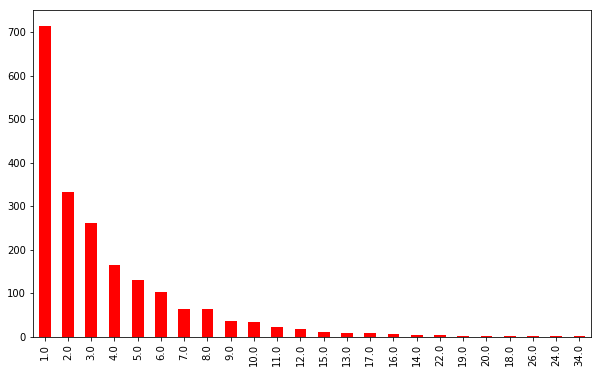

FGFR1_c.719G>A_wt


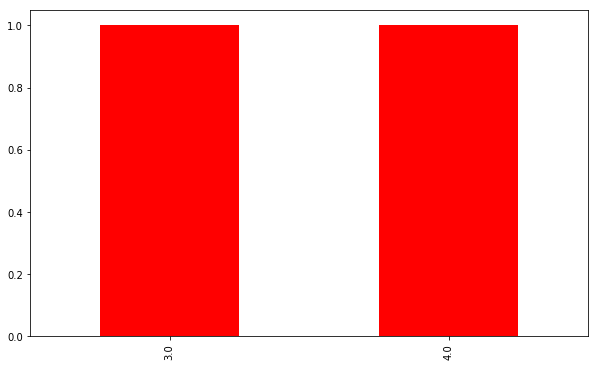

KRAS_c.34G>T_mt


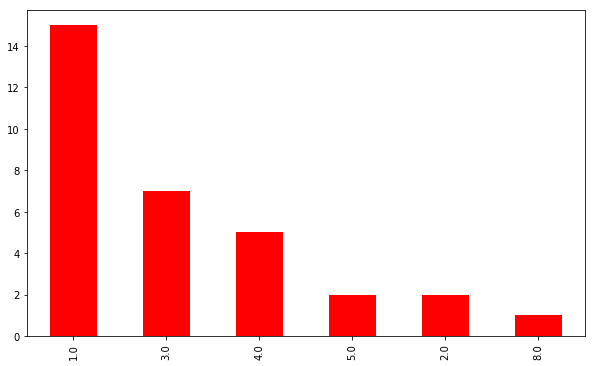

KRAS_c.34G>T_wt


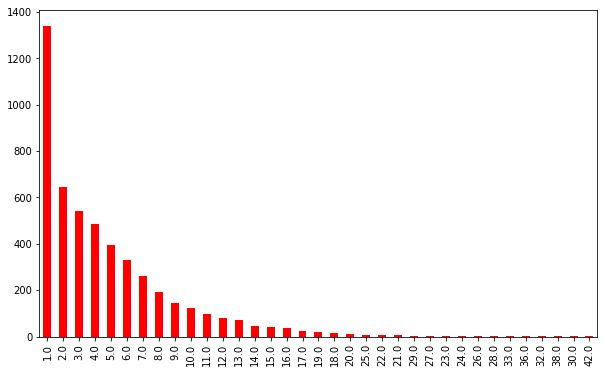

PTPRC_c.2306T>A_wt


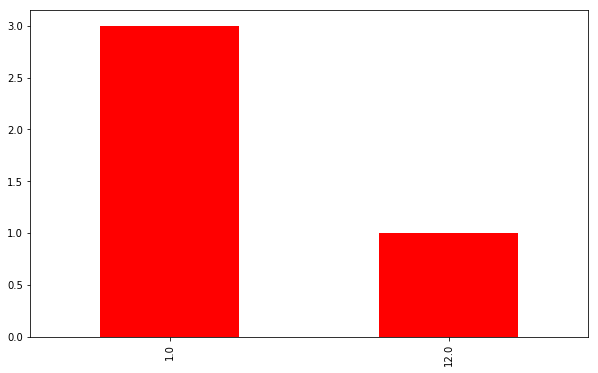

TP63_c.1090G>A_mt


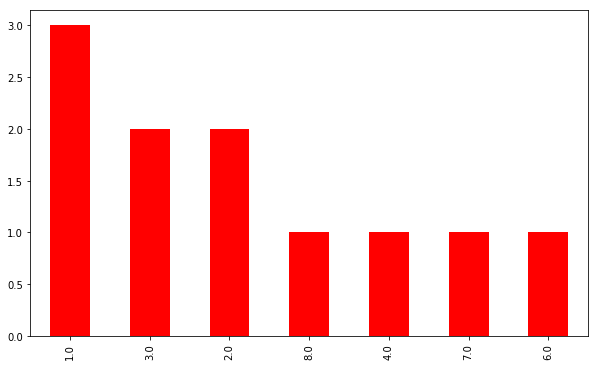

TP63_c.1090G>A_wt


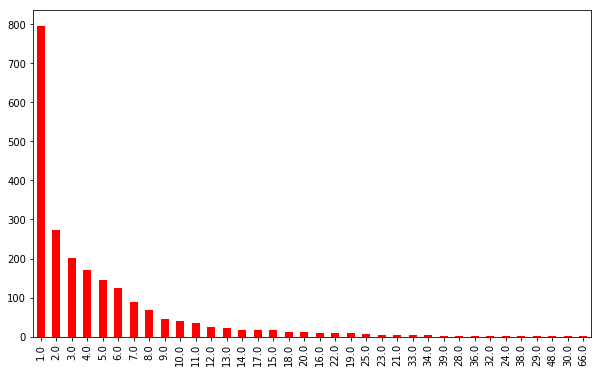

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

for c in linear_df.columns:
    fig, ax = plt.subplots(figsize=(10, 6))

    print (c)
    ax.legend()

    linear_df[c].value_counts().plot(kind='bar',color="red")
    # df[c].value_counts().plot(kind='bar')
    plt.show()

DNAJB1_c.558C>A_mt


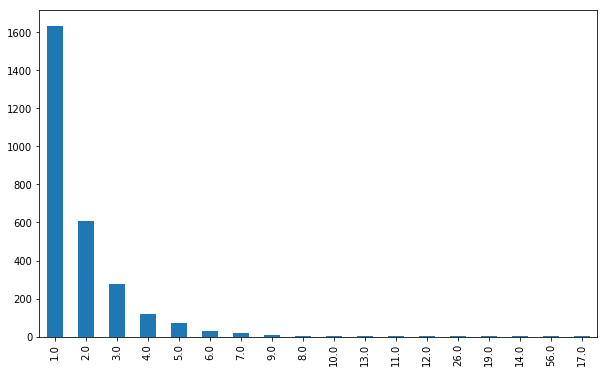

DNAJB1_c.558C>A_wt


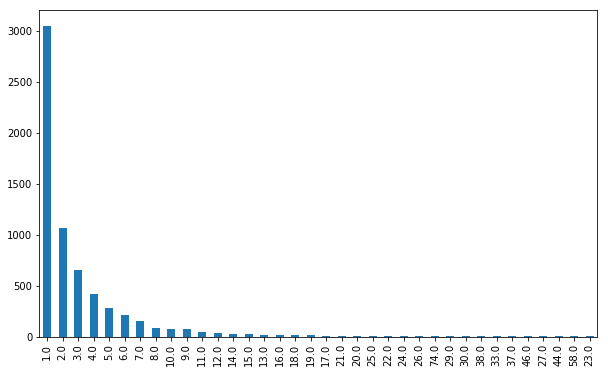

FGFR1_c.719G>A_mt


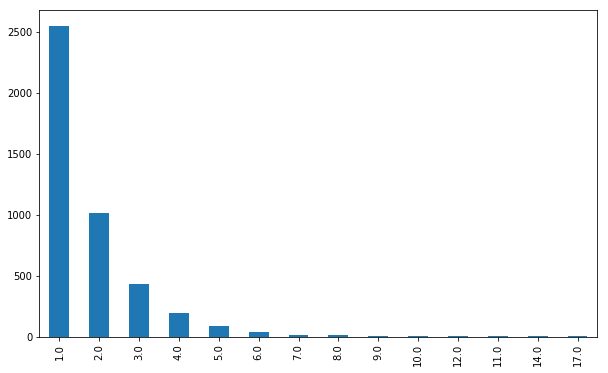

FGFR1_c.719G>A_wt


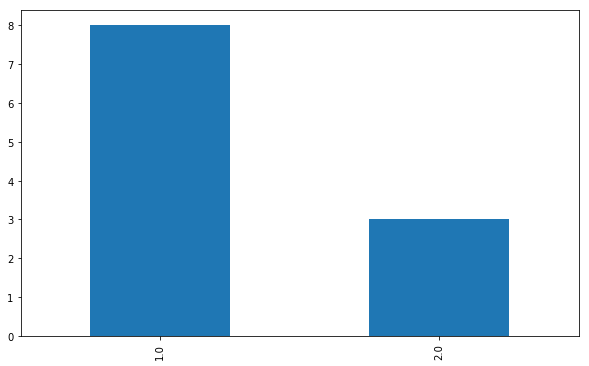

KRAS_c.34G>T_mt


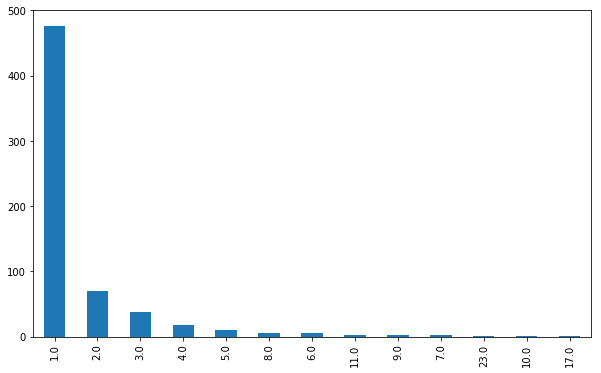

KRAS_c.34G>T_wt


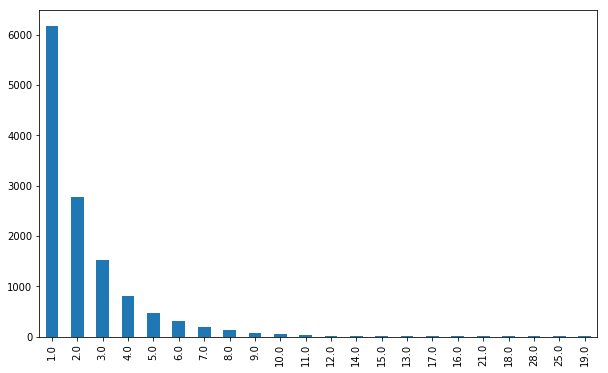

PTPRC_c.2306T>A_mt


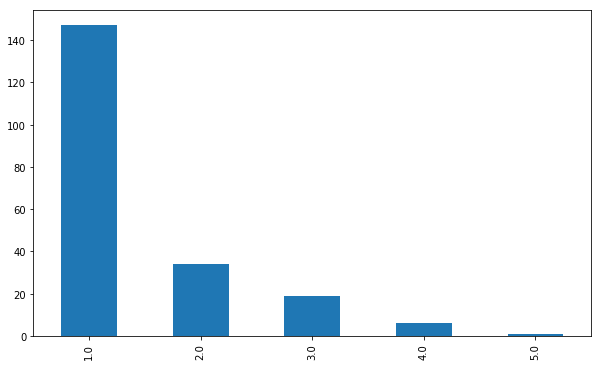

PTPRC_c.2306T>A_wt


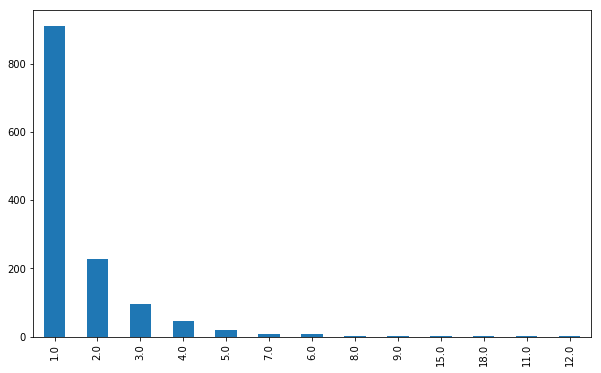

TP63_c.1090G>A_mt


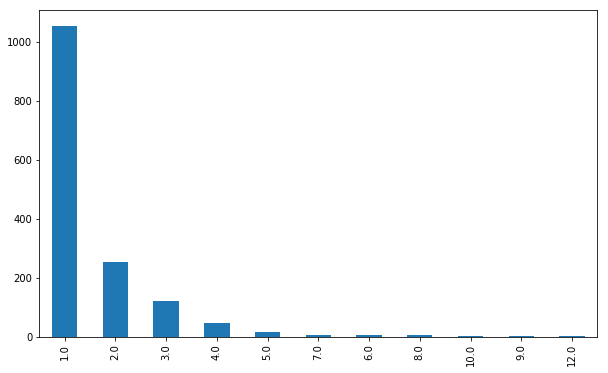

TP63_c.1090G>A_wt


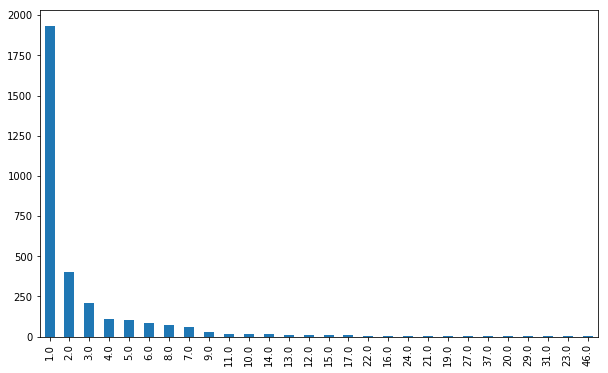

In [221]:

for c in df.columns:
    fig, ax = plt.subplots(figsize=(10, 6))

    print (c)
    ax.legend()

    df[c].value_counts().plot(kind='bar')
    plt.show()

# ddpadlock

In [13]:
target_dict={'DNAJB1_c.558C>A_gap': 'TCCGTCGGGGTTTAGCCGCTTGTGGAGATTTTCATCTTCTTGGTACAGC',
 'DNAJB1_c.558C>A_mt': 'TCCGTCGGGGTTTAGCCGCTTGTGTGAGATTTTCATCTTCTTGGTACAGC',
 'DNAJB1_c.558C>A_wt': 'TCCGTCGGGGTTTAGCCGCTTGTGGGAGATTTTCATCTTCTTGGTACAGC',
 'FGFR1_c.719G>A_gap': 'ATTATGATGCTCCAGGTGGCATAAGGACCTTGTAGCCTCCAATTCTGTG',
 'FGFR1_c.719G>A_mt': 'ATTATGATGCTCCAGGTGGCATAATGGACCTTGTAGCCTCCAATTCTGTG',
 'FGFR1_c.719G>A_wt': 'ATTATGATGCTCCAGGTGGCATAACGGACCTTGTAGCCTCCAATTCTGTG',
 'KRAS_c.34G>T_gap': 'TCAAGGCACTCTTGCCTACGCCACAGCTCCAACTACCACAAGTTTATAT',
 'KRAS_c.34G>T_mt': 'TCAAGGCACTCTTGCCTACGCCACAAGCTCCAACTACCACAAGTTTATAT',
 'KRAS_c.34G>T_wt': 'TCAAGGCACTCTTGCCTACGCCACCAGCTCCAACTACCACAAGTTTATAT',
 'PTPRC_c.2306T>A_gap': 'CCAAAAGCCCGAGTGCCCTCTTCCTTGACGGCCAGTATTCTGCACACTT',
 'PTPRC_c.2306T>A_mt': 'CCAAAAGCCCGAGTGCCCTCTTCCTTTGACGGCCAGTATTCTGCACACTT',
 'PTPRC_c.2306T>A_wt': 'CCAAAAGCCCGAGTGCCCTCTTCCATTGACGGCCAGTATTCTGCACACTT',
 'TP63_c.1090G>A_gap': 'CACCGTTCTTTGTACTGTCCGAAATTGCTGCTTTCTGATGCTATCTTCA',
 'TP63_c.1090G>A_mt': 'CACCGTTCTTTGTACTGTCCGAAATTTGCTGCTTTCTGATGCTATCTTCA',
 'TP63_c.1090G>A_wt': 'CACCGTTCTTTGTACTGTCCGAAACTTGCTGCTTTCTGATGCTATCTTCA'}

In [20]:
mut_only="/gne/data/dnaseq/processed_runs/R9922/results/LIB6221274_SAM24439398_S13_L002_R2_001.fastq.gz"
# mix_mut_R2='/gne/data/dnaseq/processed_runs/R9922/results/LIB6221273_SAM24439397_S12_L002_R2_001.fastq.gz'
# mix_mut_R1='/gne/data/dnaseq/processed_runs/R9922/results/LIB6221273_SAM24439397_S12_L002_R1_001.fastq.gz'
mix_mut_valid_cb='/gstore/scratch/u/lauj22/NGS5110_ddPadlock/10X_ddpadlock_Mutation/LIB6221273_SAM24439397/outs/per_sample_outs/LIB6221273_SAM24439397/count/sample_filtered_barcodes.csv'

In [8]:
ls /gstore/home/taol9/ctgbioinfo/taol9/flex/ddpadlock/R9922/

LIB6221273_SAM24439397_S12_L002_R1_001.fastq
LIB6221273_SAM24439397_S12_L002_R2_001.fastq
LIB6221274_SAM24439398_S13_L001_R1_001.fastq.bgz
LIB6221274_SAM24439398_S13_L001_R1_001.md5
LIB6221274_SAM24439398_S13_L001_R2_001.fastq.bgz
LIB6221274_SAM24439398_S13_L001_R2_001.md5
LIB6221274_SAM24439398_S13_L002_R1_001.fastq.bgz
LIB6221274_SAM24439398_S13_L002_R1_001.md5
LIB6221274_SAM24439398_S13_L002_R2_001.fastq.bgz
LIB6221274_SAM24439398_S13_L002_R2_001.md5


In [15]:
# !gunzip /gstore/home/taol9/ctgbioinfo/taol9/flex/ddpadlock/R9922/*.gz

In [ ]:
#zcat foo.gz | bgzip -c > foo.bgz

In [16]:
mix_mut_R2='/gstore/home/taol9/ctgbioinfo/taol9/flex/ddpadlock/R9922/LIB6221273_SAM24439397_S12_L002_R2_001.fastq'
mix_mut_R1='/gstore/home/taol9/ctgbioinfo/taol9/flex/ddpadlock/R9922/LIB6221273_SAM24439397_S12_L002_R1_001.fastq'

In [ ]:
ddpadlock_df, ddpadlock_mm=flex_mutation_mapper(mix_mut_R1, mix_mut_R2,target_dict=target_dict,pickle_name='ddpadlock_mix_mut.pickle',whitelist="/gstore/home/taol9/gitsss/yo/flex/737K-fixed-rna-profiling.txt")

In [ ]:
len(ddpadlock_df)

In [ ]:
cbcr=[x[:-2] for x in pd.read_csv(mix_mut_valid_cb, header=None)[1].to_list()]
to_df={}
for k,i in ddpadlock_mm.items():
    tmp={}
    if k in cbcr:
        for kk,ii in i.items():
            tmp[kk]=len(Counter(ii))
        to_df[k]=tmp

In [ ]:
ddpadlock_df

In [ ]:
df=pd.DataFrame.from_dict(to_df,orient='index')

In [ ]:
df.columns.to_list()

SORTED DATAFRAME


,KRAS_c.34G>T_mt,KRAS_c.34G>T_wt,TP63_c.1090G>A_wt,DNAJB1_c.558C>A_wt,TP63_c.1090G>A_mt,DNAJB1_c.558C>A_mt
0,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,NaN,NaN,NaN,NaN,2.0
2,NaN,NaN,NaN,NaN,NaN,3.0
3,NaN,NaN,NaN,NaN,NaN,7.0
4,NaN,NaN,NaN,NaN,NaN,8.0
...,...,...,...,...,...,...
672,54.0,4.0,NaN,NaN,NaN,NaN
673,55.0,3.0,NaN,NaN,NaN,NaN
674,56.0,5.0,NaN,1.0,NaN,NaN
675,58.0,5.0,NaN,NaN,NaN,NaN


In [71]:
def loci(x):
    l=0
    for i in x:
        if i>0:
            l+=1
    return l
    

In [76]:
df['loci']=df.apply(loci, axis=1)

In [79]:
df['loci'].value_counts()

1    409
2    241
3     21
4      6
Name: loci, dtype: int64

In [78]:

print('SORTED DATAFRAME')
df.sort_values(by = 'loci', axis=0, ascending=[False], inplace=False,
               kind='quicksort', na_position='first', ignore_index=True, key=None)

SORTED DATAFRAME


,KRAS_c.34G>T_mt,KRAS_c.34G>T_wt,TP63_c.1090G>A_wt,DNAJB1_c.558C>A_wt,TP63_c.1090G>A_mt,DNAJB1_c.558C>A_mt,loci
0,1.0,1.0,NaN,57.0,NaN,4.0,4
1,10.0,1.0,29.0,NaN,1.0,NaN,4
2,8.0,1.0,2.0,NaN,34.0,NaN,4
3,5.0,1.0,1.0,NaN,16.0,NaN,4
4,1.0,1.0,48.0,3.0,NaN,NaN,4
...,...,...,...,...,...,...,...
672,1.0,NaN,NaN,NaN,NaN,NaN,1
673,1.0,NaN,NaN,NaN,NaN,NaN,1
674,1.0,NaN,NaN,NaN,NaN,NaN,1
675,1.0,NaN,NaN,NaN,NaN,NaN,1


In [58]:
ddpadlock_df['DNAJB1_c.558C>A_mt'].value_counts()

1.0    13
2.0     2
8.0     2
4.0     1
6.0     1
7.0     1
5.0     1
3.0     1
Name: DNAJB1_c.558C>A_mt, dtype: int64

In [52]:
df['DNAJB1_c.558C>A_mt'].value_counts()

1.0    11
8.0     2
4.0     1
7.0     1
3.0     1
2.0     1
Name: DNAJB1_c.558C>A_mt, dtype: int64

In [46]:
ddpadlock_df[['DNAJB1_c.558C>A_wt','DNAJB1_c.558C>A_mt']].value_counts()

DNAJB1_c.558C>A_wt  DNAJB1_c.558C>A_mt
1.0                 1.0                   1
5.0                 1.0                   1
6.0                 1.0                   1
7.0                 1.0                   1
8.0                 1.0                   1
9.0                 1.0                   1
13.0                1.0                   1
14.0                2.0                   1
16.0                1.0                   1
20.0                1.0                   1
34.0                1.0                   1
57.0                4.0                   1
dtype: int64

In [53]:
df[['DNAJB1_c.558C>A_wt','DNAJB1_c.558C>A_mt']].value_counts()

DNAJB1_c.558C>A_wt  DNAJB1_c.558C>A_mt
1.0                 1.0                   1
5.0                 1.0                   1
6.0                 1.0                   1
7.0                 1.0                   1
9.0                 1.0                   1
13.0                1.0                   1
16.0                1.0                   1
20.0                1.0                   1
34.0                1.0                   1
57.0                4.0                   1
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for c in linear_df.columns:
    fig, ax = plt.subplots(figsize=(10, 6))

    print (c)
    ax.legend()

    linear_df[c].value_counts().plot(kind='bar',color="red")
    # df[c].value_counts().plot(kind='bar')
    plt.show()